In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
#import torch
#import torch.nn as nn
#from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from sklearn import metrics

In [68]:
flight_data = pd.read_csv('./data/flights.csv')


/var/folders/qy/6d6qxz1j32bds09zc9kblsmc0000gn/T/ipykernel_83689/4100709285.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv('./data/flights.csv')


In [69]:
flight_data

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK    FL_DATE  \
0        2020        1      1             1            3   1/1/2020   
1        2020        1      1             1            3   1/1/2020   
2        2020        1      1             1            3   1/1/2020   
3        2020        1      1             1            3   1/1/2020   
4        2020        1      1             1            3   1/1/2020   
...       ...      ...    ...           ...          ...        ...   
2745842  2020        2      6            13            6  6/13/2020   
2745843  2020        2      6            13            6  6/13/2020   
2745844  2020        2      6            13            6  6/13/2020   
2745845  2020        2      6            13            6  6/13/2020   
2745846  2020        2      6            13            6  6/13/2020   

        MKT_UNIQUE_CARRIER  MKT_CARRIER_FL_NUM TAIL_NUM ORIGIN  ...  \
0                       WN                5888   N951WN    ONT  ...   
1                       WN                6276   N467WN    ONT  ...   
2                       WN                4598   N7885A    ONT  ...   
3                       WN                4761   N551WN    ONT  ...   
4                       WN                5162   N968WN    ONT  ...   
...                    ...                 ...      ...    ...  ...   
2745842                 AS                1209   N413AS    SEA  ...   
2745843                 AS                1216   N929VA    PHX  ...   
2745844                 AS                1217   N929VA    SEA  ...   
2745845                 AS                1223   N841VA    SNA  ...   
2745846                 AS                1229   N413AS    HNL  ...   

        CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME DISTANCE DISTANCE_GROUP  \
0                   95.0               122.0     74.0      363              2   
1                   90.0                92.0     71.0      363              2   
2                   70.0                68.0     57.0      333              2   
3                   75.0                75.0     63.0      333              2   
4                   80.0                67.0     57.0      333              2   
...                  ...                 ...      ...      ...            ...   
2745842            375.0               342.0    329.0     2677             11   
2745843            176.0               170.0    145.0     1107              5   
2745844            185.0               175.0    154.0     1107              5   
2745845            165.0               164.0    145.0      978              4   
2745846            338.0               338.0    316.0     2677             11   

        CARRIER_DELAY WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
0                 8.0           0.0       27.0             0.0   
1                 NaN           NaN        NaN             NaN   
2                 NaN           NaN        NaN             NaN   
3                 NaN           NaN        NaN             NaN   
4                 NaN           NaN        NaN             NaN   
...               ...           ...        ...             ...   
2745842           NaN           NaN        NaN             NaN   
2745843           NaN           NaN        NaN             NaN   
2745844           NaN           NaN        NaN             NaN   
2745845           NaN           NaN        NaN             NaN   
2745846           NaN           NaN        NaN             NaN   

         LATE_AIRCRAFT_DELAY  
0                       33.0  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
2745842                  NaN  
2745843                  NaN  
2745844                  NaN  
2745845                  NaN  
2745846                  NaN  

[2745847 rows x 47 columns]

In [70]:
flight_data = flight_data.rename(columns={'DAY_OF_MONTH':'DAY'})

In [71]:
flight_data['FL_DATE'] = pd.to_datetime(flight_data['FL_DATE'])

In [72]:
flight_data

YEAR  QUARTER  MONTH  DAY  DAY_OF_WEEK    FL_DATE MKT_UNIQUE_CARRIER  \
0        2020        1      1    1            3 2020-01-01                 WN   
1        2020        1      1    1            3 2020-01-01                 WN   
2        2020        1      1    1            3 2020-01-01                 WN   
3        2020        1      1    1            3 2020-01-01                 WN   
4        2020        1      1    1            3 2020-01-01                 WN   
...       ...      ...    ...  ...          ...        ...                ...   
2745842  2020        2      6   13            6 2020-06-13                 AS   
2745843  2020        2      6   13            6 2020-06-13                 AS   
2745844  2020        2      6   13            6 2020-06-13                 AS   
2745845  2020        2      6   13            6 2020-06-13                 AS   
2745846  2020        2      6   13            6 2020-06-13                 AS   

         MKT_CARRIER_FL_NUM TAIL_NUM ORIGIN  ... CRS_ELAPSED_TIME  \
0                      5888   N951WN    ONT  ...             95.0   
1                      6276   N467WN    ONT  ...             90.0   
2                      4598   N7885A    ONT  ...             70.0   
3                      4761   N551WN    ONT  ...             75.0   
4                      5162   N968WN    ONT  ...             80.0   
...                     ...      ...    ...  ...              ...   
2745842                1209   N413AS    SEA  ...            375.0   
2745843                1216   N929VA    PHX  ...            176.0   
2745844                1217   N929VA    SEA  ...            185.0   
2745845                1223   N841VA    SNA  ...            165.0   
2745846                1229   N413AS    HNL  ...            338.0   

        ACTUAL_ELAPSED_TIME AIR_TIME DISTANCE DISTANCE_GROUP CARRIER_DELAY  \
0                     122.0     74.0      363              2           8.0   
1                      92.0     71.0      363              2           NaN   
2                      68.0     57.0      333              2           NaN   
3                      75.0     63.0      333              2           NaN   
4                      67.0     57.0      333              2           NaN   
...                     ...      ...      ...            ...           ...   
2745842               342.0    329.0     2677             11           NaN   
2745843               170.0    145.0     1107              5           NaN   
2745844               175.0    154.0     1107              5           NaN   
2745845               164.0    145.0      978              4           NaN   
2745846               338.0    316.0     2677             11           NaN   

        WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
0                 0.0       27.0             0.0                 33.0  
1                 NaN        NaN             NaN                  NaN  
2                 NaN        NaN             NaN                  NaN  
3                 NaN        NaN             NaN                  NaN  
4                 NaN        NaN             NaN                  NaN  
...               ...        ...             ...                  ...  
2745842           NaN        NaN             NaN                  NaN  
2745843           NaN        NaN             NaN                  NaN  
2745844           NaN        NaN             NaN                  NaN  
2745845           NaN        NaN             NaN                  NaN  
2745846           NaN        NaN             NaN                  NaN  

[2745847 rows x 47 columns]

In [73]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['FL_DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [74]:
flight_data['CRS_DEP_TIME'] = create_flight_time(flight_data, 'CRS_DEP_TIME')
flight_data['DEP_TIME'] = flight_data['DEP_TIME'].apply(format_heure)
flight_data['CRS_ARR_TIME'] = flight_data['CRS_ARR_TIME'].apply(format_heure)
flight_data['ARR_TIME'] = flight_data['ARR_TIME'].apply(format_heure)
#__________________________________________________________________________
flight_data.loc[:5, ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'DEP_TIME',
             'ARR_TIME', 'DEP_DELAY', 'ARR_DELAY']]

CRS_DEP_TIME CRS_ARR_TIME  DEP_TIME  ARR_TIME  DEP_DELAY  ARR_DELAY
0 2020-01-01 18:10:00     19:45:00  18:51:00  20:53:00       41.0       68.0
1 2020-01-01 11:50:00     13:20:00  11:46:00  13:18:00       -4.0       -2.0
2 2020-01-01 20:20:00     21:30:00  20:16:00  21:24:00       -4.0       -6.0
3 2020-01-01 13:40:00     14:55:00  13:50:00  15:05:00       10.0       10.0
4 2020-01-01 09:15:00     10:35:00  09:16:00  10:23:00        1.0      -12.0
5 2020-01-01 06:00:00     07:15:00  06:02:00  07:22:00        2.0        7.0

In [75]:
#find
total_count = flight_data['MKT_UNIQUE_CARRIER'].count()
cancelled_count = flight_data[flight_data['CANCELLED'] == 1]['MKT_UNIQUE_CARRIER'].count()

print('Total flights', total_count, 'and Cancelled flights',cancelled_count, '. So % of cancelled flights: ', round(cancelled_count/total_count*100,2) ,'%')

Total flights 2745847 and Cancelled flights 282926 . So % of cancelled flights:  10.3 %


In [76]:
# remove those cancelled flights which are not useful in prediction
flight_data = flight_data[flight_data['CANCELLED'] == 0]

In [77]:
flight_data.shape

(2462921, 47)

In [78]:
flight_data_select = flight_data[['MKT_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
         'FL_DATE', 'MONTH',
         'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DEP_TIME', 'DEP_DELAY_GROUP',
         'ARR_TIME', 'DEP_DELAY', 'ARR_DELAY', 'ARR_DELAY_GROUP',
         'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME','DAY_OF_WEEK', 
         'NAS_DELAY', 'SECURITY_DELAY',
         'CARRIER_DELAY']]

In [79]:
flight_data_select.head(10)

MKT_UNIQUE_CARRIER ORIGIN DEST    FL_DATE  MONTH        CRS_DEP_TIME  \
0                 WN    ONT  SFO 2020-01-01      1 2020-01-01 18:10:00   
1                 WN    ONT  SFO 2020-01-01      1 2020-01-01 11:50:00   
2                 WN    ONT  SJC 2020-01-01      1 2020-01-01 20:20:00   
3                 WN    ONT  SJC 2020-01-01      1 2020-01-01 13:40:00   
4                 WN    ONT  SJC 2020-01-01      1 2020-01-01 09:15:00   
5                 WN    ONT  SJC 2020-01-01      1 2020-01-01 06:00:00   
6                 WN    ONT  SJC 2020-01-01      1 2020-01-01 16:20:00   
7                 WN    ONT  SMF 2020-01-01      1 2020-01-01 15:05:00   
8                 WN    ONT  SMF 2020-01-01      1 2020-01-01 12:30:00   
9                 WN    ONT  SMF 2020-01-01      1 2020-01-01 07:40:00   

  CRS_ARR_TIME  DEP_TIME  DEP_DELAY_GROUP  ARR_TIME  DEP_DELAY  ARR_DELAY  \
0     19:45:00  18:51:00              2.0  20:53:00       41.0       68.0   
1     13:20:00  11:46:00             -1.0  13:18:00       -4.0       -2.0   
2     21:30:00  20:16:00             -1.0  21:24:00       -4.0       -6.0   
3     14:55:00  13:50:00              0.0  15:05:00       10.0       10.0   
4     10:35:00  09:16:00              0.0  10:23:00        1.0      -12.0   
5     07:15:00  06:02:00              0.0  07:22:00        2.0        7.0   
6     17:40:00  16:24:00              0.0  17:36:00        4.0       -4.0   
7     16:30:00  16:04:00              3.0  17:17:00       59.0       47.0   
8     13:55:00  12:25:00             -1.0  14:05:00       -5.0       10.0   
9     09:00:00  07:40:00              0.0  09:04:00        0.0        4.0   

   ARR_DELAY_GROUP  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  DAY_OF_WEEK  \
0              4.0              95.0                122.0            3   
1             -1.0              90.0                 92.0            3   
2             -1.0              70.0                 68.0            3   
3              0.0              75.0                 75.0            3   
4             -1.0              80.0                 67.0            3   
5              0.0              75.0                 80.0            3   
6             -1.0              80.0                 72.0            3   
7              3.0              85.0                 73.0            3   
8              0.0              85.0                100.0            3   
9              0.0              80.0                 84.0            3   

   NAS_DELAY  SECURITY_DELAY  CARRIER_DELAY  
0       27.0             0.0            8.0  
1        NaN             NaN            NaN  
2        NaN             NaN            NaN  
3        NaN             NaN            NaN  
4        NaN             NaN            NaN  
5        NaN             NaN            NaN  
6        NaN             NaN            NaN  
7        0.0             7.0            0.0  
8        NaN             NaN            NaN  
9        NaN             NaN            NaN

In [80]:
missing_df = flight_data_select.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flight_data_select.shape[0]-missing_df['missing values'])/flight_data_select.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

variable  missing values  filling factor (%)
0         CARRIER_DELAY         2184695           11.296586
1             NAS_DELAY         2184695           11.296586
2        SECURITY_DELAY         2184695           11.296586
3   ACTUAL_ELAPSED_TIME            4408           99.821026
4       ARR_DELAY_GROUP            4408           99.821026
5             ARR_DELAY            4408           99.821026
6              ARR_TIME             628           99.974502
7              DEP_TIME               0          100.000000
8       DEP_DELAY_GROUP               0          100.000000
9          CRS_DEP_TIME               0          100.000000
10            DEP_DELAY               0          100.000000
11                MONTH               0          100.000000
12              FL_DATE               0          100.000000
13     CRS_ELAPSED_TIME               0          100.000000
14                 DEST               0          100.000000
15          DAY_OF_WEEK               0          100.000000
16               ORIGIN               0          100.000000
17         CRS_ARR_TIME               0          100.000000
18   MKT_UNIQUE_CARRIER               0          100.000000

In [81]:
flight_data_select = flight_data_select[(flight_data_select.ORIGIN.isin(['LAX','JFK','ATL','ORD','ANC','MIA','SFO','EWR']))]
                                        
                   #|(flight_data_select.DEST.isin(['LAX','JFK','ATL','ORD']))]

In [82]:
flight_data_select.reset_index(drop=True)

MKT_UNIQUE_CARRIER ORIGIN DEST    FL_DATE  MONTH        CRS_DEP_TIME  \
0                      WN    SFO  BUR 2020-01-01      1 2020-01-01 16:00:00   
1                      WN    SFO  BUR 2020-01-01      1 2020-01-01 13:55:00   
2                      WN    SFO  BUR 2020-01-01      1 2020-01-01 12:00:00   
3                      WN    SFO  BUR 2020-01-01      1 2020-01-01 19:30:00   
4                      WN    SFO  BUR 2020-01-01      1 2020-01-01 09:50:00   
...                   ...    ...  ...        ...    ...                 ...   
459579                 AS    ANC  SEA 2020-06-13      6 2020-06-13 01:10:00   
459580                 AS    ANC  SEA 2020-06-13      6 2020-06-13 11:40:00   
459581                 AS    ANC  SEA 2020-06-13      6 2020-06-13 06:10:00   
459582                 AS    ANC  AKN 2020-06-13      6 2020-06-13 09:00:00   
459583                 AS    SFO  SEA 2020-06-13      6 2020-06-13 07:30:00   

       CRS_ARR_TIME  DEP_TIME  DEP_DELAY_GROUP  ARR_TIME  DEP_DELAY  \
0          17:15:00  16:11:00              0.0  17:16:00       11.0   
1          15:15:00  13:55:00              0.0  15:08:00        0.0   
2          13:25:00  12:00:00              0.0  13:29:00        0.0   
3          20:45:00  19:36:00              0.0  20:42:00        6.0   
4          11:10:00  09:44:00             -1.0  10:46:00       -6.0   
...             ...       ...              ...       ...        ...   
459579     05:27:00  01:03:00             -1.0  05:21:00       -7.0   
459580     15:57:00  11:21:00             -2.0  15:41:00      -19.0   
459581     10:25:00  05:52:00             -2.0  10:30:00      -18.0   
459582     10:02:00  08:49:00             -1.0  09:58:00      -11.0   
459583     09:31:00  07:30:00              0.0  09:29:00        0.0   

        ARR_DELAY  ARR_DELAY_GROUP  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  \
0             1.0              0.0              75.0                 65.0   
1            -7.0             -1.0              80.0                 73.0   
2             4.0              0.0              85.0                 89.0   
3            -3.0             -1.0              75.0                 66.0   
4           -24.0             -2.0              80.0                 62.0   
...           ...              ...               ...                  ...   
459579       -6.0             -1.0             197.0                198.0   
459580      -16.0             -2.0             197.0                200.0   
459581        5.0              0.0             195.0                218.0   
459582       -4.0             -1.0              62.0                 69.0   
459583       -2.0             -1.0             121.0                119.0   

        DAY_OF_WEEK  NAS_DELAY  SECURITY_DELAY  CARRIER_DELAY  
0                 3        NaN             NaN            NaN  
1                 3        NaN             NaN            NaN  
2                 3        NaN             NaN            NaN  
3                 3        NaN             NaN            NaN  
4                 3        NaN             NaN            NaN  
...             ...        ...             ...            ...  
459579            6        NaN             NaN            NaN  
459580            6        NaN             NaN            NaN  
459581            6        NaN             NaN            NaN  
459582            6        NaN             NaN            NaN  
459583            6        NaN             NaN            NaN  

[459584 rows x 19 columns]

In [83]:
flight_data_select.iloc[:, -5:] = flight_data_select.iloc[:, -5:].fillna(0)

In [84]:
flight_data_select

MKT_UNIQUE_CARRIER ORIGIN DEST    FL_DATE  MONTH        CRS_DEP_TIME  \
556                     WN    SFO  BUR 2020-01-01      1 2020-01-01 16:00:00   
557                     WN    SFO  BUR 2020-01-01      1 2020-01-01 13:55:00   
558                     WN    SFO  BUR 2020-01-01      1 2020-01-01 12:00:00   
559                     WN    SFO  BUR 2020-01-01      1 2020-01-01 19:30:00   
560                     WN    SFO  BUR 2020-01-01      1 2020-01-01 09:50:00   
...                    ...    ...  ...        ...    ...                 ...   
2745824                 AS    ANC  SEA 2020-06-13      6 2020-06-13 01:10:00   
2745826                 AS    ANC  SEA 2020-06-13      6 2020-06-13 11:40:00   
2745827                 AS    ANC  SEA 2020-06-13      6 2020-06-13 06:10:00   
2745828                 AS    ANC  AKN 2020-06-13      6 2020-06-13 09:00:00   
2745835                 AS    SFO  SEA 2020-06-13      6 2020-06-13 07:30:00   

        CRS_ARR_TIME  DEP_TIME  DEP_DELAY_GROUP  ARR_TIME  DEP_DELAY  \
556         17:15:00  16:11:00              0.0  17:16:00       11.0   
557         15:15:00  13:55:00              0.0  15:08:00        0.0   
558         13:25:00  12:00:00              0.0  13:29:00        0.0   
559         20:45:00  19:36:00              0.0  20:42:00        6.0   
560         11:10:00  09:44:00             -1.0  10:46:00       -6.0   
...              ...       ...              ...       ...        ...   
2745824     05:27:00  01:03:00             -1.0  05:21:00       -7.0   
2745826     15:57:00  11:21:00             -2.0  15:41:00      -19.0   
2745827     10:25:00  05:52:00             -2.0  10:30:00      -18.0   
2745828     10:02:00  08:49:00             -1.0  09:58:00      -11.0   
2745835     09:31:00  07:30:00              0.0  09:29:00        0.0   

         ARR_DELAY  ARR_DELAY_GROUP  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  \
556            1.0              0.0              75.0                 65.0   
557           -7.0             -1.0              80.0                 73.0   
558            4.0              0.0              85.0                 89.0   
559           -3.0             -1.0              75.0                 66.0   
560          -24.0             -2.0              80.0                 62.0   
...            ...              ...               ...                  ...   
2745824       -6.0             -1.0             197.0                198.0   
2745826      -16.0             -2.0             197.0                200.0   
2745827        5.0              0.0             195.0                218.0   
2745828       -4.0             -1.0              62.0                 69.0   
2745835       -2.0             -1.0             121.0                119.0   

         DAY_OF_WEEK  NAS_DELAY  SECURITY_DELAY  CARRIER_DELAY  
556                3        0.0             0.0            0.0  
557                3        0.0             0.0            0.0  
558                3        0.0             0.0            0.0  
559                3        0.0             0.0            0.0  
560                3        0.0             0.0            0.0  
...              ...        ...             ...            ...  
2745824            6        0.0             0.0            0.0  
2745826            6        0.0             0.0            0.0  
2745827            6        0.0             0.0            0.0  
2745828            6        0.0             0.0            0.0  
2745835            6        0.0             0.0            0.0  

[459584 rows x 19 columns]

In [86]:
flight_data_select.dropna(inplace = True)
#flight_data_select.drop(columns = ['LATE_AIRCRAFT_DELAY'], inplace = True)
flight_data_select

MKT_UNIQUE_CARRIER ORIGIN DEST    FL_DATE  MONTH        CRS_DEP_TIME  \
556                     WN    SFO  BUR 2020-01-01      1 2020-01-01 16:00:00   
557                     WN    SFO  BUR 2020-01-01      1 2020-01-01 13:55:00   
558                     WN    SFO  BUR 2020-01-01      1 2020-01-01 12:00:00   
559                     WN    SFO  BUR 2020-01-01      1 2020-01-01 19:30:00   
560                     WN    SFO  BUR 2020-01-01      1 2020-01-01 09:50:00   
...                    ...    ...  ...        ...    ...                 ...   
2745824                 AS    ANC  SEA 2020-06-13      6 2020-06-13 01:10:00   
2745826                 AS    ANC  SEA 2020-06-13      6 2020-06-13 11:40:00   
2745827                 AS    ANC  SEA 2020-06-13      6 2020-06-13 06:10:00   
2745828                 AS    ANC  AKN 2020-06-13      6 2020-06-13 09:00:00   
2745835                 AS    SFO  SEA 2020-06-13      6 2020-06-13 07:30:00   

        CRS_ARR_TIME  DEP_TIME  DEP_DELAY_GROUP  ARR_TIME  DEP_DELAY  \
556         17:15:00  16:11:00              0.0  17:16:00       11.0   
557         15:15:00  13:55:00              0.0  15:08:00        0.0   
558         13:25:00  12:00:00              0.0  13:29:00        0.0   
559         20:45:00  19:36:00              0.0  20:42:00        6.0   
560         11:10:00  09:44:00             -1.0  10:46:00       -6.0   
...              ...       ...              ...       ...        ...   
2745824     05:27:00  01:03:00             -1.0  05:21:00       -7.0   
2745826     15:57:00  11:21:00             -2.0  15:41:00      -19.0   
2745827     10:25:00  05:52:00             -2.0  10:30:00      -18.0   
2745828     10:02:00  08:49:00             -1.0  09:58:00      -11.0   
2745835     09:31:00  07:30:00              0.0  09:29:00        0.0   

         ARR_DELAY  ARR_DELAY_GROUP  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  \
556            1.0              0.0              75.0                 65.0   
557           -7.0             -1.0              80.0                 73.0   
558            4.0              0.0              85.0                 89.0   
559           -3.0             -1.0              75.0                 66.0   
560          -24.0             -2.0              80.0                 62.0   
...            ...              ...               ...                  ...   
2745824       -6.0             -1.0             197.0                198.0   
2745826      -16.0             -2.0             197.0                200.0   
2745827        5.0              0.0             195.0                218.0   
2745828       -4.0             -1.0              62.0                 69.0   
2745835       -2.0             -1.0             121.0                119.0   

         DAY_OF_WEEK  NAS_DELAY  SECURITY_DELAY  CARRIER_DELAY  
556                3        0.0             0.0            0.0  
557                3        0.0             0.0            0.0  
558                3        0.0             0.0            0.0  
559                3        0.0             0.0            0.0  
560                3        0.0             0.0            0.0  
...              ...        ...             ...            ...  
2745824            6        0.0             0.0            0.0  
2745826            6        0.0             0.0            0.0  
2745827            6        0.0             0.0            0.0  
2745828            6        0.0             0.0            0.0  
2745835            6        0.0             0.0            0.0  

[458728 rows x 19 columns]

In [87]:
flight_data_select.iloc[:,-3:] = flight_data_select.iloc[:,-3:].applymap(lambda x:1 if x > 0 else 0)

In [88]:
flight_data_select

MKT_UNIQUE_CARRIER ORIGIN DEST    FL_DATE  MONTH        CRS_DEP_TIME  \
556                     WN    SFO  BUR 2020-01-01      1 2020-01-01 16:00:00   
557                     WN    SFO  BUR 2020-01-01      1 2020-01-01 13:55:00   
558                     WN    SFO  BUR 2020-01-01      1 2020-01-01 12:00:00   
559                     WN    SFO  BUR 2020-01-01      1 2020-01-01 19:30:00   
560                     WN    SFO  BUR 2020-01-01      1 2020-01-01 09:50:00   
...                    ...    ...  ...        ...    ...                 ...   
2745824                 AS    ANC  SEA 2020-06-13      6 2020-06-13 01:10:00   
2745826                 AS    ANC  SEA 2020-06-13      6 2020-06-13 11:40:00   
2745827                 AS    ANC  SEA 2020-06-13      6 2020-06-13 06:10:00   
2745828                 AS    ANC  AKN 2020-06-13      6 2020-06-13 09:00:00   
2745835                 AS    SFO  SEA 2020-06-13      6 2020-06-13 07:30:00   

        CRS_ARR_TIME  DEP_TIME  DEP_DELAY_GROUP  ARR_TIME  DEP_DELAY  \
556         17:15:00  16:11:00              0.0  17:16:00       11.0   
557         15:15:00  13:55:00              0.0  15:08:00        0.0   
558         13:25:00  12:00:00              0.0  13:29:00        0.0   
559         20:45:00  19:36:00              0.0  20:42:00        6.0   
560         11:10:00  09:44:00             -1.0  10:46:00       -6.0   
...              ...       ...              ...       ...        ...   
2745824     05:27:00  01:03:00             -1.0  05:21:00       -7.0   
2745826     15:57:00  11:21:00             -2.0  15:41:00      -19.0   
2745827     10:25:00  05:52:00             -2.0  10:30:00      -18.0   
2745828     10:02:00  08:49:00             -1.0  09:58:00      -11.0   
2745835     09:31:00  07:30:00              0.0  09:29:00        0.0   

         ARR_DELAY  ARR_DELAY_GROUP  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  \
556            1.0              0.0              75.0                 65.0   
557           -7.0             -1.0              80.0                 73.0   
558            4.0              0.0              85.0                 89.0   
559           -3.0             -1.0              75.0                 66.0   
560          -24.0             -2.0              80.0                 62.0   
...            ...              ...               ...                  ...   
2745824       -6.0             -1.0             197.0                198.0   
2745826      -16.0             -2.0             197.0                200.0   
2745827        5.0              0.0             195.0                218.0   
2745828       -4.0             -1.0              62.0                 69.0   
2745835       -2.0             -1.0             121.0                119.0   

         DAY_OF_WEEK  NAS_DELAY  SECURITY_DELAY  CARRIER_DELAY  
556                3          0               0              0  
557                3          0               0              0  
558                3          0               0              0  
559                3          0               0              0  
560                3          0               0              0  
...              ...        ...             ...            ...  
2745824            6          0               0              0  
2745826            6          0               0              0  
2745827            6          0               0              0  
2745828            6          0               0              0  
2745835            6          0               0              0  

[458728 rows x 19 columns]

In [89]:
def generateWeather(data):
    if data == 'T':
        return 'ThunderStorm'
    elif data == 'S':
        return 'Snow'
    elif float(data) > 0:
        return 'Rain'
    else:
        return 'Normal'
        

In [90]:
ATL = pd.read_csv('./data/ATL.csv')
ATL['Date'] = pd.to_datetime(ATL['Date'])
ATL['Weather'] = ATL['Precipitation'].apply(generateWeather)
ATL.drop(columns = ['Max Temp','Min Temp','Avg Temp','Departure','HDD','CDD','Precipitation','New Snow','Snow Depth'], inplace = True)
ATL.columns = (['FL_DATE','ORIGIN','Weather'])

In [91]:
SFO = pd.read_csv('./data/SFO.csv')
SFO['Date'] = pd.to_datetime(SFO['Date'])
SFO['Weather'] = SFO['Precipitation'].apply(generateWeather)
SFO.drop(columns = ['Temp_Max','Temp_Min','Temp_Avg','Temp_Dep','HDD','CDD','Precipitation','New Snow','Snow Depth'], inplace = True)
SFO.columns = (['FL_DATE','ORIGIN','Weather'])

In [92]:
ANC = pd.read_csv('./data/ANC.csv')
ANC['Date'] = pd.to_datetime(ANC['Date'])
ANC['Weather'] = ANC['Precipitation'].apply(generateWeather)
ANC.drop(columns = ['Max Temp','Min Temp','Avg Temp','Departure','HDD','CDD','Precipitation','New Snow','Snow Depth'], inplace = True)
ANC.columns = (['FL_DATE','ORIGIN','Weather'])

In [93]:
MIA = pd.read_csv('./data/MIA.csv')
MIA['Date'] = pd.to_datetime(MIA['Date'])
MIA['Weather'] = MIA['Precipitation'].apply(generateWeather)
MIA.drop(columns = ['Unnamed: 11','Temp_Max','Temp_Min','Temp_Avg','Temp_Dep','HDD','CDD','Precipitation','New Snow','Snow Depth'], inplace = True)
MIA.columns = (['FL_DATE','ORIGIN','Weather'])

In [94]:
EWR = pd.read_csv('./data/EWR.csv')
EWR['Date'] = pd.to_datetime(EWR['Date'])
EWR['Weather'] = EWR['Precipitation'].apply(generateWeather)
EWR.drop(columns = ['Temp_Max','Temp_Min','Temp_Avg','Temp_Dep','HDD','CDD','Precipitation','New Snow','Snow Depth'], inplace = True)
EWR.columns = (['FL_DATE','ORIGIN','Weather'])

In [95]:
LAX = pd.read_csv('./data/LAX.csv')
LAX['Date'] = pd.to_datetime(LAX['Date'])
LAX['Weather'] = LAX['Precipitation'].apply(generateWeather)
LAX.drop(columns = ['Temp_Max','Temp_Min','Temp_Avg','Temp_Dep','HDD','CDD','Precipitation','New Snow','Snow Depth'], inplace = True)
LAX.columns = (['FL_DATE','ORIGIN','Weather'])

In [96]:
JFK = pd.read_csv('./data/JFK.csv')
JFK['Date'] = pd.to_datetime(JFK['Date'])
JFK['Weather'] = JFK['Precipitation'].apply(generateWeather)
JFK.drop(columns = ['Max Temp','Min Temp','Avg Temp','Departure','HDD','CDD','Precipitation','New Snow','Snow Depth'], inplace = True)
JFK.columns = (['FL_DATE','ORIGIN','Weather'])

In [97]:
ORD = pd.read_csv('./data/ORD.csv')
ORD['Date'] = pd.to_datetime(ORD['Date'])
ORD['Weather'] = ORD['Precipitation'].apply(generateWeather)
ORD.drop(columns = ['Temp_Max','Temp_Min','Temp_Avg','Temp_Dep','HDD','CDD','Precipitation','New Snow','Snow Depth'], inplace = True)
ORD.columns = (['FL_DATE','ORIGIN','Weather'])

In [98]:
flight_data_select_1 = pd.merge(flight_data_select,ATL, how='left', on=['FL_DATE','ORIGIN'])
flight_data_select_2 = pd.merge(flight_data_select_1,ORD, how='left', on=['FL_DATE','ORIGIN'])
flight_data_select_3 = pd.merge(flight_data_select_2,LAX, how='left', on=['FL_DATE','ORIGIN'])
flight_data_select_4 = pd.merge(flight_data_select_3,JFK, how='left', on=['FL_DATE','ORIGIN'])
flight_data_select_5 = pd.merge(flight_data_select_4,MIA, how='left', on=['FL_DATE','ORIGIN'])
flight_data_select_6 = pd.merge(flight_data_select_5,EWR, how='left', on=['FL_DATE','ORIGIN'])
flight_data_select_7 = pd.merge(flight_data_select_6,SFO, how='left', on=['FL_DATE','ORIGIN'])
flight_data_select_8 = pd.merge(flight_data_select_7,ANC, how='left', on=['FL_DATE','ORIGIN'])

/var/folders/qy/6d6qxz1j32bds09zc9kblsmc0000gn/T/ipykernel_83689/87909572.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Weather_x'} in the result is deprecated and will raise a MergeError in a future version.
  flight_data_select_4 = pd.merge(flight_data_select_3,JFK, how='left', on=['FL_DATE','ORIGIN'])
/var/folders/qy/6d6qxz1j32bds09zc9kblsmc0000gn/T/ipykernel_83689/87909572.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Weather_x'} in the result is deprecated and will raise a MergeError in a future version.
  flight_data_select_6 = pd.merge(flight_data_select_5,EWR, how='left', on=['FL_DATE','ORIGIN'])
/var/folders/qy/6d6qxz1j32bds09zc9kblsmc0000gn/T/ipykernel_83689/87909572.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Weather_x'} in the result is deprecated and will raise a MergeError in a future version.
  flight_data_select_8 = pd.merge(flight_data_select_7,ANC, how='left', on=['FL_DATE','ORIGIN'])


In [99]:
flight_data_select_8

MKT_UNIQUE_CARRIER ORIGIN DEST    FL_DATE  MONTH        CRS_DEP_TIME  \
0                      WN    SFO  BUR 2020-01-01      1 2020-01-01 16:00:00   
1                      WN    SFO  BUR 2020-01-01      1 2020-01-01 13:55:00   
2                      WN    SFO  BUR 2020-01-01      1 2020-01-01 12:00:00   
3                      WN    SFO  BUR 2020-01-01      1 2020-01-01 19:30:00   
4                      WN    SFO  BUR 2020-01-01      1 2020-01-01 09:50:00   
...                   ...    ...  ...        ...    ...                 ...   
458723                 AS    ANC  SEA 2020-06-13      6 2020-06-13 01:10:00   
458724                 AS    ANC  SEA 2020-06-13      6 2020-06-13 11:40:00   
458725                 AS    ANC  SEA 2020-06-13      6 2020-06-13 06:10:00   
458726                 AS    ANC  AKN 2020-06-13      6 2020-06-13 09:00:00   
458727                 AS    SFO  SEA 2020-06-13      6 2020-06-13 07:30:00   

       CRS_ARR_TIME  DEP_TIME  DEP_DELAY_GROUP  ARR_TIME  ...  SECURITY_DELAY  \
0          17:15:00  16:11:00              0.0  17:16:00  ...               0   
1          15:15:00  13:55:00              0.0  15:08:00  ...               0   
2          13:25:00  12:00:00              0.0  13:29:00  ...               0   
3          20:45:00  19:36:00              0.0  20:42:00  ...               0   
4          11:10:00  09:44:00             -1.0  10:46:00  ...               0   
...             ...       ...              ...       ...  ...             ...   
458723     05:27:00  01:03:00             -1.0  05:21:00  ...               0   
458724     15:57:00  11:21:00             -2.0  15:41:00  ...               0   
458725     10:25:00  05:52:00             -2.0  10:30:00  ...               0   
458726     10:02:00  08:49:00             -1.0  09:58:00  ...               0   
458727     09:31:00  07:30:00              0.0  09:29:00  ...               0   

        CARRIER_DELAY  Weather_x Weather_y  Weather_x Weather_y  Weather_x  \
0                   0        NaN       NaN        NaN       NaN        NaN   
1                   0        NaN       NaN        NaN       NaN        NaN   
2                   0        NaN       NaN        NaN       NaN        NaN   
3                   0        NaN       NaN        NaN       NaN        NaN   
4                   0        NaN       NaN        NaN       NaN        NaN   
...               ...        ...       ...        ...       ...        ...   
458723              0        NaN       NaN        NaN       NaN        NaN   
458724              0        NaN       NaN        NaN       NaN        NaN   
458725              0        NaN       NaN        NaN       NaN        NaN   
458726              0        NaN       NaN        NaN       NaN        NaN   
458727              0        NaN       NaN        NaN       NaN        NaN   

       Weather_y  Weather_x Weather_y  
0            NaN     Normal       NaN  
1            NaN     Normal       NaN  
2            NaN     Normal       NaN  
3            NaN     Normal       NaN  
4            NaN     Normal       NaN  
...          ...        ...       ...  
458723       NaN        NaN    Normal  
458724       NaN        NaN    Normal  
458725       NaN        NaN    Normal  
458726       NaN        NaN    Normal  
458727       NaN     Normal       NaN  

[458728 rows x 27 columns]

In [100]:
flight_data_select_8.to_csv('./data/flight_data_weather1.csv')

In [113]:
final_data = pd.read_csv('./data/flight_data_weather1.csv')

In [114]:
final_data.columns

Index(['Unnamed: 0', 'MKT_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'FL_DATE',
       'MONTH', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DEP_TIME', 'DEP_DELAY_GROUP',
       'ARR_TIME', 'DEP_DELAY', 'ARR_DELAY', 'ARR_DELAY_GROUP',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DAY_OF_WEEK', 'NAS_DELAY',
       'SECURITY_DELAY', 'CARRIER_DELAY', 'Weather_x', 'Weather_y',
       'Weather_x.1', 'Weather_y.1', 'Weather_x.2', 'Weather_y.2',
       'Weather_x.3', 'Weather_y.3', 'Weather'],
      dtype='object')

In [115]:
final_data['DEP_DELAY_GROUP'].describe()

count    458728.000000
mean         -0.344230
std           1.763085
min          -2.000000
25%          -1.000000
50%          -1.000000
75%           0.000000
max          12.000000
Name: DEP_DELAY_GROUP, dtype: float64

In [116]:
final_data.drop(columns = ['Unnamed: 0','ARR_DELAY','ARR_DELAY_GROUP','CRS_ELAPSED_TIME',
                          'ARR_TIME','ACTUAL_ELAPSED_TIME','DEP_DELAY_GROUP','CRS_ARR_TIME',
                           'DEST','CRS_DEP_TIME','FL_DATE','Weather_x', 'Weather_y', 'Weather_x.1',
       'Weather_y.1', 'Weather_x.2', 'Weather_y.2', 'Weather_x.3',
       'Weather_y.3'], inplace = True)

In [117]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

LE = LabelEncoder()
OHE = OneHotEncoder()

In [118]:
final_data

MKT_UNIQUE_CARRIER ORIGIN  MONTH  DEP_TIME  DEP_DELAY  DAY_OF_WEEK  \
0                      WN    SFO      1  16:11:00         11            3   
1                      WN    SFO      1  13:55:00          0            3   
2                      WN    SFO      1  12:00:00          0            3   
3                      WN    SFO      1  19:36:00          6            3   
4                      WN    SFO      1   9:44:00         -6            3   
...                   ...    ...    ...       ...        ...          ...   
458723                 AS    ANC      6   1:03:00         -7            6   
458724                 AS    ANC      6  11:21:00        -19            6   
458725                 AS    ANC      6   5:52:00        -18            6   
458726                 AS    ANC      6   8:49:00        -11            6   
458727                 AS    SFO      6   7:30:00          0            6   

        NAS_DELAY  SECURITY_DELAY  CARRIER_DELAY Weather  
0               0               0              0  Normal  
1               0               0              0  Normal  
2               0               0              0  Normal  
3               0               0              0  Normal  
4               0               0              0  Normal  
...           ...             ...            ...     ...  
458723          0               0              0  Normal  
458724          0               0              0  Normal  
458725          0               0              0  Normal  
458726          0               0              0  Normal  
458727          0               0              0  Normal  

[458728 rows x 10 columns]

In [119]:
final_data.columns = ['Carrier','Airport','Month','Time','Delay','DOW','CarrierFact','NASFact','SecurityFact','Weather']

In [120]:
def getTime(time):
    t = None
    if time <= '10:00:00' and time > '7:00:00':
        t = 'Morning'
    elif time <= '13:00:00' and time > '10:00:00':
        t = 'Noon'
    elif time <= '17:00:00' and time > '13:00:00':
        t = 'Afternoon'
    elif time <= '20:00:00' and time > '17:00:00':
        t = 'Evening'
    else:
        t = 'Night'
    return t

def getDelay(time):
    t = None
    if time < 15:
        t = 'On Time'
    #elif time >= 15 and time < 45:
    #    t = 'Slight Delay'
    else:
        t = 'Severe Delay'
    return t

In [121]:
final_data

Carrier Airport  Month      Time  Delay  DOW  CarrierFact  NASFact  \
0           WN     SFO      1  16:11:00     11    3            0        0   
1           WN     SFO      1  13:55:00      0    3            0        0   
2           WN     SFO      1  12:00:00      0    3            0        0   
3           WN     SFO      1  19:36:00      6    3            0        0   
4           WN     SFO      1   9:44:00     -6    3            0        0   
...        ...     ...    ...       ...    ...  ...          ...      ...   
458723      AS     ANC      6   1:03:00     -7    6            0        0   
458724      AS     ANC      6  11:21:00    -19    6            0        0   
458725      AS     ANC      6   5:52:00    -18    6            0        0   
458726      AS     ANC      6   8:49:00    -11    6            0        0   
458727      AS     SFO      6   7:30:00      0    6            0        0   

        SecurityFact Weather  
0                  0  Normal  
1                  0  Normal  
2                  0  Normal  
3                  0  Normal  
4                  0  Normal  
...              ...     ...  
458723             0  Normal  
458724             0  Normal  
458725             0  Normal  
458726             0  Normal  
458727             0  Normal  

[458728 rows x 10 columns]

In [122]:
final_data['Time'] = final_data['Time'].map(lambda x:getTime(x))

In [123]:
final_data['Delay'] = final_data['Delay'].map(lambda x:getDelay(x))

In [124]:
final_data

Carrier Airport  Month       Time    Delay  DOW  CarrierFact  NASFact  \
0           WN     SFO      1  Afternoon  On Time    3            0        0   
1           WN     SFO      1  Afternoon  On Time    3            0        0   
2           WN     SFO      1       Noon  On Time    3            0        0   
3           WN     SFO      1    Evening  On Time    3            0        0   
4           WN     SFO      1      Night  On Time    3            0        0   
...        ...     ...    ...        ...      ...  ...          ...      ...   
458723      AS     ANC      6    Evening  On Time    6            0        0   
458724      AS     ANC      6       Noon  On Time    6            0        0   
458725      AS     ANC      6      Night  On Time    6            0        0   
458726      AS     ANC      6      Night  On Time    6            0        0   
458727      AS     SFO      6      Night  On Time    6            0        0   

        SecurityFact Weather  
0                  0  Normal  
1                  0  Normal  
2                  0  Normal  
3                  0  Normal  
4                  0  Normal  
...              ...     ...  
458723             0  Normal  
458724             0  Normal  
458725             0  Normal  
458726             0  Normal  
458727             0  Normal  

[458728 rows x 10 columns]

In [125]:
final_data.to_csv('1204data.csv')

In [126]:
final_data = pd.read_csv('1204data.csv')

In [127]:
final_data = final_data.drop(['Unnamed: 0', 'Month'], axis = 1)
final_data['Delay'] = final_data['Delay'].map(lambda x: 'On Time' if x =='On Time' else 'Delay')

In [128]:
final_data.head(10)

Carrier Airport       Time    Delay  DOW  CarrierFact  NASFact  \
0      WN     SFO  Afternoon  On Time    3            0        0   
1      WN     SFO  Afternoon  On Time    3            0        0   
2      WN     SFO       Noon  On Time    3            0        0   
3      WN     SFO    Evening  On Time    3            0        0   
4      WN     SFO      Night  On Time    3            0        0   
5      WN     SFO      Night  On Time    3            0        0   
6      WN     SFO  Afternoon  On Time    3            0        0   
7      WN     SFO       Noon  On Time    3            0        0   
8      WN     SFO      Night  On Time    3            0        0   
9      WN     SFO    Evening    Delay    3            1        0   

   SecurityFact Weather  
0             0  Normal  
1             0  Normal  
2             0  Normal  
3             0  Normal  
4             0  Normal  
5             0  Normal  
6             0  Normal  
7             0  Normal  
8             0  Normal  
9             1  Normal

In [129]:
final_data[['CarrierFact','NASFact','SecurityFact','Delay']]

CarrierFact  NASFact  SecurityFact    Delay
0                 0        0             0  On Time
1                 0        0             0  On Time
2                 0        0             0  On Time
3                 0        0             0  On Time
4                 0        0             0  On Time
...             ...      ...           ...      ...
458723            0        0             0  On Time
458724            0        0             0  On Time
458725            0        0             0  On Time
458726            0        0             0  On Time
458727            0        0             0  On Time

[458728 rows x 4 columns]

In [131]:
carrierd = pd.get_dummies(final_data['Carrier'], prefix = 'Carrier')
airportd = pd.get_dummies(final_data['Airport'], prefix = 'Airport')
#monthd = pd.get_dummies(final_data['Month'], prefix = 'Month')
timed = pd.get_dummies(final_data['Time'], prefix = 'Time')
dowd = pd.get_dummies(final_data['DOW'], prefix = 'Dow')
weatherd = pd.get_dummies(final_data['Weather'], prefix = 'Weather')

In [132]:
final_dummy_data = pd.concat([carrierd,airportd,timed,dowd,weatherd,final_data[['CarrierFact','NASFact','SecurityFact','Delay']]], axis = 1)

In [133]:
final_dummy_data

Carrier_AA  Carrier_AS  Carrier_B6  Carrier_DL  Carrier_F9  \
0                0           0           0           0           0   
1                0           0           0           0           0   
2                0           0           0           0           0   
3                0           0           0           0           0   
4                0           0           0           0           0   
...            ...         ...         ...         ...         ...   
458723           0           1           0           0           0   
458724           0           1           0           0           0   
458725           0           1           0           0           0   
458726           0           1           0           0           0   
458727           0           1           0           0           0   

        Carrier_G4  Carrier_HA  Carrier_NK  Carrier_UA  Carrier_WN  ...  \
0                0           0           0           0           1  ...   
1                0           0           0           0           1  ...   
2                0           0           0           0           1  ...   
3                0           0           0           0           1  ...   
4                0           0           0           0           1  ...   
...            ...         ...         ...         ...         ...  ...   
458723           0           0           0           0           0  ...   
458724           0           0           0           0           0  ...   
458725           0           0           0           0           0  ...   
458726           0           0           0           0           0  ...   
458727           0           0           0           0           0  ...   

        Dow_6  Dow_7  Weather_Normal  Weather_Rain  Weather_Snow  \
0           0      0               1             0             0   
1           0      0               1             0             0   
2           0      0               1             0             0   
3           0      0               1             0             0   
4           0      0               1             0             0   
...       ...    ...             ...           ...           ...   
458723      1      0               1             0             0   
458724      1      0               1             0             0   
458725      1      0               1             0             0   
458726      1      0               1             0             0   
458727      1      0               1             0             0   

        Weather_ThunderStorm  CarrierFact  NASFact  SecurityFact    Delay  
0                          0            0        0             0  On Time  
1                          0            0        0             0  On Time  
2                          0            0        0             0  On Time  
3                          0            0        0             0  On Time  
4                          0            0        0             0  On Time  
...                      ...          ...      ...           ...      ...  
458723                     0            0        0             0  On Time  
458724                     0            0        0             0  On Time  
458725                     0            0        0             0  On Time  
458726                     0            0        0             0  On Time  
458727                     0            0        0             0  On Time  

[458728 rows x 37 columns]

In [134]:
final_dummy_data.to_csv('1204dummy.csv')

# This is where last step starts!

In [2]:
final_dummy_data = pd.read_csv('1204dummy.csv')
final_dummy_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
final_dummy_data.head(5)

Carrier_AA  Carrier_AS  Carrier_B6  Carrier_DL  Carrier_F9  Carrier_G4  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Carrier_HA  Carrier_NK  Carrier_UA  Carrier_WN  ...  Dow_6  Dow_7  \
0           0           0           0           1  ...      0      0   
1           0           0           0           1  ...      0      0   
2           0           0           0           1  ...      0      0   
3           0           0           0           1  ...      0      0   
4           0           0           0           1  ...      0      0   

   Weather_Normal  Weather_Rain  Weather_Snow  Weather_ThunderStorm  \
0               1             0             0                     0   
1               1             0             0                     0   
2               1             0             0                     0   
3               1             0             0                     0   
4               1             0             0                     0   

   CarrierFact  NASFact  SecurityFact    Delay  
0            0        0             0  On Time  
1            0        0             0  On Time  
2            0        0             0  On Time  
3            0        0             0  On Time  
4            0        0             0  On Time  

[5 rows x 37 columns]

In [4]:
final_dummy_data.iloc[1,:]

Carrier_AA                    0
Carrier_AS                    0
Carrier_B6                    0
Carrier_DL                    0
Carrier_F9                    0
Carrier_G4                    0
Carrier_HA                    0
Carrier_NK                    0
Carrier_UA                    0
Carrier_WN                    1
Airport_ANC                   0
Airport_ATL                   0
Airport_EWR                   0
Airport_JFK                   0
Airport_LAX                   0
Airport_MIA                   0
Airport_ORD                   0
Airport_SFO                   1
Time_Afternoon                1
Time_Evening                  0
Time_Night                    0
Time_Noon                     0
Dow_1                         0
Dow_2                         0
Dow_3                         1
Dow_4                         0
Dow_5                         0
Dow_6                         0
Dow_7                         0
Weather_Normal                1
Weather_Rain                  0
Weather_

In [5]:
train, eval = train_test_split(final_dummy_data, random_state=26, test_size=0.20, shuffle=True)

In [6]:
input_cols = [col for col in final_dummy_data.columns if col not in ['Delay']]
input_cols

['Carrier_AA',
 'Carrier_AS',
 'Carrier_B6',
 'Carrier_DL',
 'Carrier_F9',
 'Carrier_G4',
 'Carrier_HA',
 'Carrier_NK',
 'Carrier_UA',
 'Carrier_WN',
 'Airport_ANC',
 'Airport_ATL',
 'Airport_EWR',
 'Airport_JFK',
 'Airport_LAX',
 'Airport_MIA',
 'Airport_ORD',
 'Airport_SFO',
 'Time_Afternoon',
 'Time_Evening',
 'Time_Night',
 'Time_Noon',
 'Dow_1',
 'Dow_2',
 'Dow_3',
 'Dow_4',
 'Dow_5',
 'Dow_6',
 'Dow_7',
 'Weather_Normal',
 'Weather_Rain',
 'Weather_Snow',
 'Weather_ThunderStorm',
 'CarrierFact',
 'NASFact',
 'SecurityFact']

In [7]:
X_train = train[input_cols]
y_train = train['Delay']

In [8]:
X_eval = eval[input_cols]
y_eval = eval['Delay']

In [142]:
prediction_table = []
prediction_eval_table = []
NB_pipeline = Pipeline([
                ('clf', MultinomialNB(fit_prior=True, class_prior=None)
                        )])

print('... Processing {}'.format('Delay'))
# train the model using X & y
NB_pipeline.fit(X_train, train['Delay'])
# compute the testing accuracy
prediction = NB_pipeline.predict(X_eval)
prediction_eval_table.append(prediction)
print('Test accuracy is {}'.format(accuracy_score(eval['Delay'], prediction)))


... Processing Delay
Test accuracy is 0.9300459965557082


In [143]:
y_pred = pd.DataFrame(prediction_eval_table).T
y_true = eval[eval.columns.tolist()[-1]].values

In [144]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       Delay       0.83      0.50      0.62     10627
     On Time       0.94      0.99      0.96     81119

    accuracy                           0.93     91746
   macro avg       0.89      0.74      0.79     91746
weighted avg       0.93      0.93      0.92     91746



In [9]:
prediction_table = []
prediction_eval_table = []
RFC_pipeline = Pipeline([
                ('clf', RandomForestClassifier(n_estimators=500, max_depth=20)
                        )])

print('... Processing {}'.format('Delay'))
# train the model using X & y
RFC_pipeline.fit(X_train, train['Delay'])
# compute the testing accuracy
prediction = RFC_pipeline.predict(X_eval)
prediction_eval_table.append(prediction)
print('Test accuracy is {}'.format(accuracy_score(eval['Delay'], prediction)))


... Processing Delay
Test accuracy is 0.9333703921696859


In [10]:
y_pred = pd.DataFrame(prediction_eval_table).T
y_true = eval[eval.columns.tolist()[-1]].values
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       Delay       0.85      0.52      0.64     10627
     On Time       0.94      0.99      0.96     81119

    accuracy                           0.93     91746
   macro avg       0.89      0.75      0.80     91746
weighted avg       0.93      0.93      0.93     91746



/Users/Kenny/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


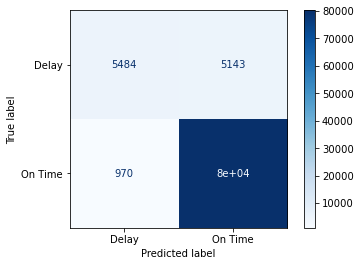

In [11]:
plot_confusion_matrix(RFC_pipeline[0], X_eval, eval['Delay'], cmap='Blues')  
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0155032 to fit


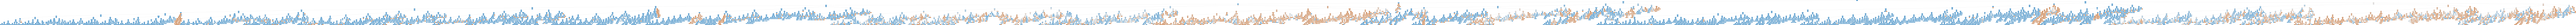

In [12]:
estimator = RFC_pipeline[0].estimators_[5]
 
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = ['On Time','Delay'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
 
# 使用系统命令转换为png（需要Graphviz）
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
 
# 显示在jupyter笔记本
from IPython.display import Image
Image(filename = 'tree.png')

In [46]:
prediction_table = []
prediction_eval_table = []
RFC_pipeline = Pipeline([
                ('clf', RandomForestClassifier(n_estimators=5000, max_depth=50)
                        )])

print('... Processing {}'.format('Delay'))
# train the model using X & y
RFC_pipeline.fit(X_train, train['Delay'])
# compute the testing accuracy
prediction = RFC_pipeline.predict(X_eval)
prediction_eval_table.append(prediction)
print('Test accuracy is {}'.format(accuracy_score(eval['Delay'], prediction)))


... Processing Delay
Test accuracy is 0.9373782187715459


In [47]:
y_pred = pd.DataFrame(prediction_eval_table).T
y_true = eval[eval.columns.tolist()[-1]].values

In [48]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       Delay       0.85      0.52      0.65      7364
     On Time       0.94      0.99      0.97     59354

    accuracy                           0.94     66718
   macro avg       0.90      0.76      0.81     66718
weighted avg       0.93      0.94      0.93     66718



In [148]:
prediction_table = []
prediction_eval_table = []
SVC_pipeline = Pipeline([ 
                ('clf', LinearSVC()
                        )])

print('... Processing {}'.format('Delay'))
# train the model using X & y
SVC_pipeline.fit(X_train, train['Delay'])
# compute the testing accuracy
prediction = SVC_pipeline.predict(X_eval)
prediction_eval_table.append(prediction)
print('Test accuracy is {}'.format(accuracy_score(eval['Delay'], prediction)))

... Processing Delay
Test accuracy is 0.9316700455605694


In [149]:
y_pred = pd.DataFrame(prediction_eval_table).T
y_true = eval[eval.columns.tolist()[-1]].values
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       Delay       0.90      0.46      0.61     10627
     On Time       0.93      0.99      0.96     81119

    accuracy                           0.93     91746
   macro avg       0.91      0.73      0.79     91746
weighted avg       0.93      0.93      0.92     91746



In [25]:
prediction_table = []
prediction_eval_table = []
SVC_pipeline = Pipeline([ 
                ('clf', LinearSVC()
                        )])

print('... Processing {}'.format('Delay'))
# train the model using X & y
SVC_pipeline.fit(X_train, train['Delay'])
# compute the testing accuracy
prediction = SVC_pipeline.predict(X_eval)
prediction_eval_table.append(prediction)
print('Test accuracy is {}'.format(accuracy_score(eval['Delay'], prediction)))


... Processing Delay
Test accuracy is 0.9359243382595401


In [26]:
y_pred = pd.DataFrame(prediction_eval_table).T
y_true = eval[eval.columns.tolist()[-1]].values

In [27]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       Delay       0.90      0.47      0.62      7364
     On Time       0.94      0.99      0.97     59354

    accuracy                           0.94     66718
   macro avg       0.92      0.73      0.79     66718
weighted avg       0.93      0.94      0.93     66718



In [150]:
prediction_table = []
prediction_eval_table = []
LR_pipeline = Pipeline([
                ('clf', LogisticRegression(solver='sag')),
            ])

print('... Processing {}'.format('Delay'))
# train the model using X_dtm & y
LR_pipeline.fit(X_train, train['Delay'])
# compute the testing accuracy
prediction = LR_pipeline.predict(X_eval)
prediction_eval_table.append(prediction)
print('Test accuracy is {}'.format(accuracy_score(eval['Delay'], prediction)))

... Processing Delay
Test accuracy is 0.9316482462450679


In [151]:
y_pred = pd.DataFrame(prediction_eval_table).T
y_true = eval[eval.columns.tolist()[-1]].values
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       Delay       0.90      0.46      0.61     10627
     On Time       0.93      0.99      0.96     81119

    accuracy                           0.93     91746
   macro avg       0.91      0.73      0.79     91746
weighted avg       0.93      0.93      0.92     91746



In [28]:
prediction_table = []
prediction_eval_table = []
LR_pipeline = Pipeline([
                ('clf', LogisticRegression(solver='sag')),
            ])

print('... Processing {}'.format('Delay'))
# train the model using X_dtm & y
LR_pipeline.fit(X_train, train['Delay'])
# compute the testing accuracy
prediction = LR_pipeline.predict(X_eval)
prediction_eval_table.append(prediction)
print('Test accuracy is {}'.format(accuracy_score(eval['Delay'], prediction)))

... Processing Delay
Test accuracy is 0.9359093498006535


In [30]:
y_pred = pd.DataFrame(prediction_eval_table).T
y_true = eval[eval.columns.tolist()[-1]].values

In [31]:
from sklearn import metrics

print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       Delay       0.90      0.47      0.62      7364
     On Time       0.94      0.99      0.97     59354

    accuracy                           0.94     66718
   macro avg       0.92      0.73      0.79     66718
weighted avg       0.93      0.94      0.93     66718



In [57]:
test_data

Carrier_AA              0
Carrier_AS              0
Carrier_B6              0
Carrier_DL              0
Carrier_F9              0
Carrier_G4              0
Carrier_HA              0
Carrier_NK              0
Carrier_UA              0
Carrier_WN              0
Airport_ATL             0
Airport_JFK             0
Airport_LAX             0
Airport_ORD             0
Time_Afternoon          0
Time_Evening            0
Time_Night              0
Time_Noon               0
Dow_1                   0
Dow_2                   0
Dow_3                   0
Dow_4                   0
Dow_5                   0
Dow_6                   0
Dow_7                   0
Weather_Normal          0
Weather_Rain            0
Weather_Snow            0
Weather_ThunderStorm    0
CarrierFact             0
NASFact                 0
SecurityFact            0
Name: 0, dtype: int64

In [14]:
from tkinter.ttk import *
import tkinter as tk

test_data = final_dummy_data.iloc[0,:-1].map(lambda x: 0)

window = tk.Tk()
window.title('Flight Delay Prediction')
window.geometry('500x320')

InfoLabel = tk.Label(window, text='Please enter relative information for prediction', font=('Arial', 14)).place(x=10, y=20)
Carrierlabel = tk.Label(window, text='Carrier', font=('Arial', 14)).place(x=10, y=50)
Carriercombo = tk.ttk.Combobox(window, font=('Arial', 14), width=10)
Carriercombo['values'] = ('AA','AS','B6','DL','F9','G4','HA','NK','UA','WN')
#Carriercombo.current(0)
Carriercombo.place(x=110, y=50)

Airportlabel = tk.Label(window, text='Airport', font=('Arial', 14)).place(x=260, y=50)
Airportcombo = tk.ttk.Combobox(window, font=('Arial', 14), width=10)
Airportcombo['values'] = ('ATL','JFK','LAX','ORD','SFO','MIA','EWR','ANC')
#Airportcombo.current(0)
Airportcombo.place(x=360, y=50)

Weatherlabel = tk.Label(window, text='Weather', font=('Arial', 14)).place(x=10, y=80)
Weathercombo = tk.ttk.Combobox(window, font=('Arial', 14), width=10)
Weathercombo['values'] = ('Normal','Rain','Snow','ThunderStorm')
#Weathercombo.current(0)
Weathercombo.place(x=110, y=80)

DOWlabel = tk.Label(window, text='Day of Week', font=('Arial', 14)).place(x=260, y=80)
DOWcombo = tk.ttk.Combobox(window, font=('Arial', 14), width=10)
DOWcombo['values'] = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
#DOWcombo.current(0)
DOWcombo.place(x=360, y=80)

Timelabel = tk.Label(window, text='Departure Time (in HH:MM format)', font=('Arial', 14)).place(x=10, y=110)
Timeenter = tk.Entry(window, font=('Arial', 14), width=20, textvariable= tk.StringVar())
Timeenter.place(x=260, y=110)


CFlabel = tk.Label(window, text='Carrier Strike', font=('Arial', 14)).place(x=10, y=140)
CFcombo = tk.ttk.Combobox(window, font=('Arial', 14), width=6)
CFcombo['values'] = ('Yes','No')
#CFcombo.current(0)
CFcombo.place(x=110, y=140)

NAAlabel = tk.Label(window, text='National Aviation Activity', font=('Arial', 14)).place(x=210, y=140)
NAAcombo = tk.ttk.Combobox(window, font=('Arial', 14), width=6)
NAAcombo['values'] = ('Yes','No')
#NAAcombo.current(0)
NAAcombo.place(x=390, y=140)

ASAlabel = tk.Label(window, text='Airport Security Activity', font=('Arial', 14)).place(x=10, y=170)
ASAcombo = tk.ttk.Combobox(window, font=('Arial', 14), width=6)
ASAcombo['values'] = ('Yes','No')
#ASAcombo.current(0)
ASAcombo.place(x=190, y=170)


label0 = tk.StringVar()
label0
PredictionLabel = tk.Label(window, textvariable=label0, bg='blue', fg='white', font=('Arial', 15), width=50, height=2)
PredictionLabel.place(x=10,y=220)


def hit():
    carrier = Carriercombo.get()  
    airport = Airportcombo.get()
    weather = Weathercombo.get()
    dow = DOWcombo.get()
    time = Timeenter.get()
    cf = CFcombo.get()
    naa = NAAcombo.get()
    asa = ASAcombo.get()
    
    test_data.map(lambda x: 0)
    test_data['Carrier_'+carrier] = 1
    test_data['Airport_'+airport] = 1
    
    temp = None
    if time <= '10:00' and time > '7:00':
        temp = 'Morning'
    elif time <= '13:00' and time > '10:00':
        temp = 'Noon'
    elif time <= '17:00' and time > '13:00':
        temp = 'Afternoon'
    elif time <= '20:00' and time > '17:00':
        temp = 'Evening'
    else:
        temp = 'Night' 
    test_data['Time_'+temp] = 1
    
    temp = None
    if dow == 'Monday':
        temp = '1'
    elif dow == 'Tuesday':
        temp = '2'
    elif dow == 'Wednesday':
        temp = '3'
    elif dow == 'Thursday':
        temp = '4'
    elif dow == 'Friday':
        temp = '5'
    elif dow == 'Saturday':
        temp = '6'
    else:
        temp = '7'
    test_data['Dow_'+temp] = 1

    test_data['Weather_'+weather] = 1
    
    if cf == 'Yes':
        test_data['CarrierFact'] = 1
        
    if naa == 'Yes':
        test_data['NASFact'] = 1
        
    if asa == 'Yes':
        test_data['SecurityFact'] = 1
    
    prediction1 = RFC_pipeline.predict([test_data.T])
    if prediction1[0] == 'Delay':
        label0.set('Ops! Your flight could possibly be delayed!')
    else:
        label0.set('Congratulations! Your flight would be on time!')
        
button = tk.Button(window, text='Predict', font=('Arial', 14), width=10, height=1, command=hit)
button.place(x=300,y=170)


def close():
    
   window.destroy()
   window.quit()
    
buttonexit = tk.Button(window, text = "Exit", font=('Arial', 14), command = close)
buttonexit.place(x=400,y=280)

In [15]:
window.mainloop()

/Users/Kenny/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/Kenny/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
